# Capstone Project
___

## Cleaning and Exploratory Data Analysis

First, let's import our Python packages.

In [54]:
# Importing Python packages:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error as mae
import joblib

# Models used:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

#Some of these packages will generate a ton of warnings...
import warnings
warnings.filterwarnings("ignore")

Let's first start with importing our dataset file.

In [3]:
# Loading the file as dataframe
df_raw = pd.read_csv('data/vehicles.csv')

Now, let's explore our data.

In [4]:
# Let's see the shape of our dataset:
df_raw.shape

(539759, 25)

As we can see, our dataset consist of 539,759 rows and 25 columns. Let's see what each row actually represent.

In [5]:
df_raw.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


It can be seen from above dataframe head, that each row represents each unique craigslist vehicle ad.

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 
 11  odometer      440783 non-null  float64
 12  title_status  536819 non-null  object 
 13  transmission  535786 non-null  object 
 14  vin           315349 non-null  object 
 15  drive         383987 non-null  object 
 16  size          168550 non-null  object 
 17  type          392290 non-null  object 
 18  pain

We can see that `county` column is actually a null column, no data is in it. So, let's remove it. But first, let's create a working copy of our raw dataframe.

In [7]:
# Creating a copy of the raw dataframe:
df_work1 = df_raw.copy()

df_work1 = df_work1.drop(['county'], axis=1)
df_work1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 
 11  odometer      440783 non-null  float64
 12  title_status  536819 non-null  object 
 13  transmission  535786 non-null  object 
 14  vin           315349 non-null  object 
 15  drive         383987 non-null  object 
 16  size          168550 non-null  object 
 17  type          392290 non-null  object 
 18  pain

In [8]:
# Let's see number of duplicate rows we have:
df_work1.duplicated().sum()

0

We can see that we don't have any duplicated rows. But is that really the case? Let's actually remove some unique columns (`id`,  `url`, `region_url`, `image_url`), which we won't be using for our model, as they probably won't make any useful impact on our model, but would take our computational capability. After dropping those, let's then check if we still have no duplicated rows.

In [9]:
# Dropping unnecessary columns:
df_work1 = df_work1.drop(['id',
                          'url', 
                          'region_url',
                          'image_url'], axis=1)

# Let's see number of duplicate rows we have:
df_work1.duplicated().sum()

37043

Now, as we can see, we have actually some duplicated rows. These were probably same ads posted few times. Let's remove them.

In [10]:
# Let's drop duplicate rows:
df_work1 = df_work1.drop_duplicates()

# Let's see number of duplicate rows we have:
df_work1.duplicated().sum()

0

We can see now that there are no duplicated rows left in our dataset.

In [11]:
df_work1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502716 entries, 0 to 539758
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        502716 non-null  object 
 1   price         502716 non-null  int64  
 2   year          501764 non-null  float64
 3   manufacturer  481335 non-null  object 
 4   model         495471 non-null  object 
 5   condition     283533 non-null  object 
 6   cylinders     300806 non-null  object 
 7   fuel          499504 non-null  object 
 8   odometer      415131 non-null  float64
 9   title_status  500059 non-null  object 
 10  transmission  498747 non-null  object 
 11  vin           298110 non-null  object 
 12  drive         360334 non-null  object 
 13  size          158068 non-null  object 
 14  type          370108 non-null  object 
 15  paint_color   344528 non-null  object 
 16  description   502695 non-null  object 
 17  state         502716 non-null  object 
 18  lat 

We also don't really need the `vin` column, for the same reason as it this feature won't make much of a useful impact on our model. Additionally, we would also exclude `state` and `region` columns, as we would use `lat` and `long` columns instead. This would allow us to have much less columns at the end (saves computational load), as we won't have to turn `state` and `region` columns into binary columns, and we would have even more precise geographical information with `lat` and `long` columns.  Also, the `description` column will not be included for now, as it's a separate NLP problem, which is out of the scope of our project for now. So, let's drop those too.

In [12]:
# Dropping columns stated above:
df_work2 = df_work1.drop(['vin', 'description', 'region', 'state'], axis=1)
df_work2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502716 entries, 0 to 539758
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         502716 non-null  int64  
 1   year          501764 non-null  float64
 2   manufacturer  481335 non-null  object 
 3   model         495471 non-null  object 
 4   condition     283533 non-null  object 
 5   cylinders     300806 non-null  object 
 6   fuel          499504 non-null  object 
 7   odometer      415131 non-null  float64
 8   title_status  500059 non-null  object 
 9   transmission  498747 non-null  object 
 10  drive         360334 non-null  object 
 11  size          158068 non-null  object 
 12  type          370108 non-null  object 
 13  paint_color   344528 non-null  object 
 14  lat           494033 non-null  float64
 15  long          494033 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 65.2+ MB


Having some knowledge about cars, we know that it's extremely unlikely that someone would sell a car for \\$0 or very small amount. Also, some of the ads would include car parts wrongly posted in the car sales section. So, to be avoid having wrong data in our dataset, let's look at and remove rows with a price of \\$0 to \\$500, and also price of more than \\$100,000, as those would be outliers.

In [13]:
# Looking at how many cars are advertised at the price of $500 or less, and $100,000 or more:
print('Number of rows with a price of $500 or less =', df_work2['price'][df_work2['price'] <= 500.0].count())
print('Number of rows with a price of $100,000 or more =', df_work2['price'][df_work2['price'] >= 100000.0].count())

Number of rows with a price of $500 or less = 49617
Number of rows with a price of $100,000 or more = 490


We can see that 49,617 cars were advertised at the price of \\$500 or less, and 490 cars were advertised at the price of \\$100,000 or more.

In [14]:
# Let's now drop those:
df_work2.drop(df_work2.loc[df_work2['price']<=500].index, inplace=True)
df_work2.drop(df_work2.loc[df_work2['price']>=100000].index, inplace=True)

In [15]:
# Double check if the values were dropped:
print('Number of rows with a price of $500 or less =', df_work2['price'][df_work2['price'] <= 500.0].count())
print('Number of rows with a price of $100,000 or more =', df_work2['price'][df_work2['price'] >= 100000.0].count())

Number of rows with a price of $500 or less = 0
Number of rows with a price of $100,000 or more = 0


In [16]:
df_work2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452609 entries, 0 to 539758
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         452609 non-null  int64  
 1   year          451718 non-null  float64
 2   manufacturer  433957 non-null  object 
 3   model         446283 non-null  object 
 4   condition     264736 non-null  object 
 5   cylinders     274168 non-null  object 
 6   fuel          449682 non-null  object 
 7   odometer      375651 non-null  float64
 8   title_status  450277 non-null  object 
 9   transmission  449246 non-null  object 
 10  drive         324109 non-null  object 
 11  size          143230 non-null  object 
 12  type          331591 non-null  object 
 13  paint_color   311901 non-null  object 
 14  lat           448844 non-null  float64
 15  long          448844 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 58.7+ MB


Let's further explore our data.

In [17]:
# Let's see how many unique values each of the columns have:
df_work2.nunique(axis=0)

price            17677
year               111
manufacturer        43
model            34924
condition            6
cylinders            8
fuel                 5
odometer        114943
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
lat              53337
long             53365
dtype: int64

We can see that we have 34,924 unique values in `model` column. Converting them into dummy variables would take too many columns and the limited computational ability. I decided to drop this column.

In [18]:
# Dropping 'model' column:
df_work2 = df_work2.drop(['model'], axis=1)
df_work2.nunique(axis=0)

price            17677
year               111
manufacturer        43
condition            6
cylinders            8
fuel                 5
odometer        114943
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
lat              53337
long             53365
dtype: int64

We can see that number of unique years are 111. Let's actually explore our year column.

In [19]:
df_work2.describe()

,price,year,odometer,lat,long
count,452609.000000,451718.000000,3.756510e+05,448844.000000,448844.000000
mean,14003.309967,2009.489956,1.026519e+05,38.444946,-93.808058
std,11048.177835,9.433785,1.866519e+05,5.898099,17.455854
min,503.000000,0.000000,0.000000e+00,-84.911400,-176.810000
25%,5900.000000,2006.000000,4.856900e+04,34.221600,-106.369000
50%,10999.000000,2011.000000,9.500000e+04,39.113200,-87.983550
75%,18999.000000,2015.000000,1.399575e+05,42.449600,-81.191525
max,99995.000000,2021.000000,6.480922e+07,84.514800,161.016000


We can see from here that the min value for our `year` column is 0, and the max value is 2021. These are not realistic values. Let's now actually see unique years in our dataset.

In [20]:
print(sorted(df_work2['year'].unique(), reverse=True))

[2019.0, 2018.0, 2017.0, 2016.0, 2015.0, 2014.0, 2013.0, 2012.0, 2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0, 2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0, 1995.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0, 1988.0, 1987.0, 1986.0, 1985.0, 1984.0, 1983.0, 1981.0, 1980.0, 1979.0, 1977.0, 1975.0, 1974.0, 1973.0, 1972.0, 1971.0, 1970.0, 1968.0, 1967.0, 1966.0, 1964.0, 1951.0, 1950.0, 1949.0, 1942.0, 1929.0, nan, 2021.0, 2020.0, 1982.0, 1978.0, 1976.0, 1969.0, 1965.0, 1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0, 1955.0, 1954.0, 1953.0, 1952.0, 1948.0, 1947.0, 1946.0, 1945.0, 1943.0, 1941.0, 1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0, 1932.0, 1931.0, 1930.0, 1928.0, 1927.0, 1926.0, 1925.0, 1924.0, 1923.0, 1922.0, 1919.0, 1918.0, 1917.0, 1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1909.0, 1908.0, 1900.0, 0.0]


We can see that we have some NAN values too. Let's see how many we have.

In [21]:
# Let's see what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            68.354584
condition       41.508896
cylinders       39.424978
paint_color     31.088202
drive           28.390951
type            26.737869
odometer        17.003197
manufacturer     4.120996
long             0.831844
lat              0.831844
transmission     0.743025
fuel             0.646695
title_status     0.515235
year             0.196859
price            0.000000
dtype: float64

We have only 0.2% null values in our year column. Let's drop those null values.

In [22]:
df_work2.dropna(subset=['year'], inplace=True)
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            68.292165
condition       41.393524
cylinders       39.498094
paint_color     31.129820
drive           28.421714
type            26.769577
odometer        17.032529
manufacturer     3.932099
long             0.829278
lat              0.829278
transmission     0.740285
fuel             0.589306
title_status     0.440540
year             0.000000
price            0.000000
dtype: float64

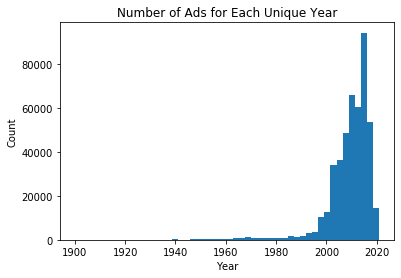

In [23]:
# Histogram of the years distribution.
plt.figure()
plt.hist(df_work2['year'], range=(1900,2021), bins=50)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Ads for Each Unique Year')
plt.show()

From the histogram above we can see that there were very few cars older than year of 1950 advertised. Let's exclude those outliers from our project scope.   

In [24]:
# Let's now grab only years starting from 1950 and till current year of 2020.
df_work2 = df_work2[df_work2['year'].between(1950, 2020)]

# Let's just double check our years:
df_work2.describe()

,price,year,odometer,lat,long
count,450645.000000,450645.000000,3.744360e+05,446908.000000,446908.000000
mean,13956.043953,2009.661064,1.028683e+05,38.453736,-93.794010
std,10996.054685,8.242734,1.867075e+05,5.894294,17.453389
min,503.000000,1950.000000,0.000000e+00,-84.911400,-176.810000
25%,5895.000000,2006.000000,4.900000e+04,34.226200,-106.366000
50%,10995.000000,2011.000000,9.514500e+04,39.123400,-87.971500
75%,18995.000000,2015.000000,1.400000e+05,42.458200,-81.179600
max,99995.000000,2020.000000,6.480922e+07,84.514800,161.016000


From the above chart we can also see that our odometer column has some outliers too, with a min of 0 mileage, and max of really high values. For our project scope, we will use realistic mileages of used cars, from 50 to 300,000 odometer values.

In [25]:
# Let's now filter out odometer values from 50 to 300,000.
df_work2 = df_work2[df_work2['odometer'].between(50, 300000)]

# Let's just double check our years:
df_work2.describe()

,price,year,odometer,lat,long
count,369238.000000,369238.000000,369238.000000,366257.000000,366257.000000
mean,14668.840905,2010.643723,98906.250567,38.638958,-93.989800
std,10870.472386,6.832618,59217.324925,5.769686,17.677334
min,503.000000,1950.000000,50.000000,-84.911400,-170.288000
25%,6495.000000,2007.000000,49500.000000,34.436900,-108.455000
50%,12200.000000,2012.000000,95112.000000,39.292800,-87.885400
75%,19988.000000,2015.000000,139012.750000,42.504800,-81.177000
max,99995.000000,2020.000000,300000.000000,84.514800,161.016000


In [26]:
# First, let's check if we have rows with empty values, and replace those empty values with NaN values
df_work2 = df_work2.replace({'':np.nan})

In [27]:
# Let's see what percentage of each column has missing values left:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            66.320639
condition       38.080317
cylinders       34.921649
paint_color     24.209859
drive           21.025463
type            18.225914
manufacturer     2.974775
transmission     0.857171
long             0.807338
lat              0.807338
fuel             0.670029
title_status     0.518907
odometer         0.000000
year             0.000000
price            0.000000
dtype: float64

Let's actually see what unique values each of our non-numeric columns have, and how many of those values are there. Let's see if some of those columns already contain values like 'other' or 'unknown', so instead of dropping null values or assigning some biased values, we would just assign null rows into those values.  

In [28]:
for i in df_work2.select_dtypes(include = ['object']).columns:
    display(pd.DataFrame(df_work2[i].value_counts()))

,manufacturer
ford,67303
chevrolet,53408
toyota,28751
nissan,19851
ram,18395
honda,18291
jeep,17988
gmc,16526
dodge,12218
bmw,10961


,condition
excellent,103813
good,97640
like new,20614
fair,5657
new,524
salvage,383


,cylinders
6 cylinders,88654
8 cylinders,74276
4 cylinders,72569
5 cylinders,2189
10 cylinders,1393
other,654
3 cylinders,423
12 cylinders,136


,fuel
gas,322870
diesel,29067
other,10890
hybrid,3197
electric,740


,title_status
clean,351698
rebuilt,9122
salvage,3860
lien,2428
missing,160
parts only,54


,transmission
automatic,324653
manual,21139
other,20281


,drive
4wd,136205
fwd,102285
rwd,53114


,size
full-size,68292
mid-size,34487
compact,18502
sub-compact,3076


,type
sedan,73559
SUV,72237
pickup,44969
truck,36307
coupe,16908
other,14098
hatchback,12066
wagon,10052
van,8430
convertible,7072


,paint_color
white,72604
black,57484
silver,42262
blue,28447
red,27829
grey,26626
green,7068
custom,7033
brown,6215
yellow,1826


As we can see from above, our `fuel` column has 0.67% of missing values, and it also has 'other' values. Let's assign our null values to be 'other':

In [29]:
# Filling in missing values in 'fuel' column:
df_work2['fuel'].fillna('other', inplace=True)

In [30]:
# Let's see what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            66.320639
condition       38.080317
cylinders       34.921649
paint_color     24.209859
drive           21.025463
type            18.225914
manufacturer     2.974775
transmission     0.857171
long             0.807338
lat              0.807338
title_status     0.518907
odometer         0.000000
fuel             0.000000
year             0.000000
price            0.000000
dtype: float64

Same goes for `title_status` column which has label of 'missing'. Let's see the distribution and assign null values to be 'missing'.

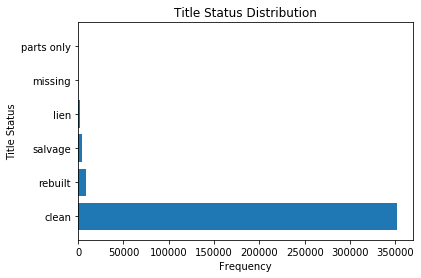

In [31]:
# See the distribution of unique values in the 'title_status' column:
plt.figure()
plt.barh(df_work2['title_status'].value_counts().index, 
         df_work2['title_status'].value_counts().values)
plt.title("Title Status Distribution")
plt.xlabel("Frequency")
plt.ylabel("Title Status")
plt.show()

In [32]:
# Filling in missing values in 'title_status' column:
df_work2['title_status'].fillna('missing', inplace=True)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            66.320639
condition       38.080317
cylinders       34.921649
paint_color     24.209859
drive           21.025463
type            18.225914
manufacturer     2.974775
transmission     0.857171
long             0.807338
lat              0.807338
title_status     0.000000
odometer         0.000000
fuel             0.000000
year             0.000000
price            0.000000
dtype: float64

Let's do same with other valid columns too.

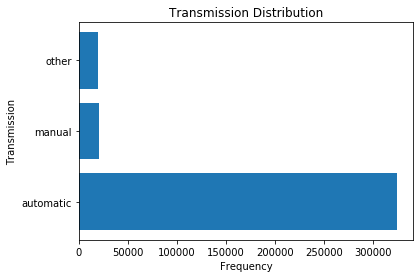

In [33]:
# See the distribution of unique values in the 'transmission' column:
plt.figure()
plt.barh(df_work2['transmission'].value_counts().index, 
         df_work2['transmission'].value_counts().values)
plt.title("Transmission Distribution")
plt.xlabel("Frequency")
plt.ylabel("Transmission")
plt.show()

In [34]:
# Filling in missing values in 'transmission' column:
df_work2['transmission'].fillna('other', inplace=True)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            66.320639
condition       38.080317
cylinders       34.921649
paint_color     24.209859
drive           21.025463
type            18.225914
manufacturer     2.974775
long             0.807338
lat              0.807338
transmission     0.000000
title_status     0.000000
odometer         0.000000
fuel             0.000000
year             0.000000
price            0.000000
dtype: float64

In [35]:
# Let's drop the column 'size', as it has more than 66% of missing values.
df_work2 = df_work2.drop(['size'], axis=1)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

condition       38.080317
cylinders       34.921649
paint_color     24.209859
drive           21.025463
type            18.225914
manufacturer     2.974775
long             0.807338
lat              0.807338
transmission     0.000000
title_status     0.000000
odometer         0.000000
fuel             0.000000
year             0.000000
price            0.000000
dtype: float64

Let's see the distribution of values in the remaining missing value columns. 

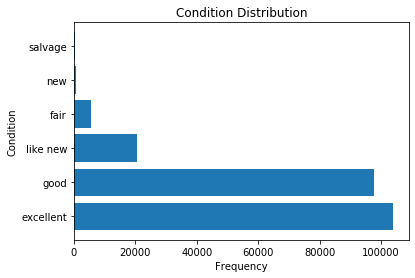

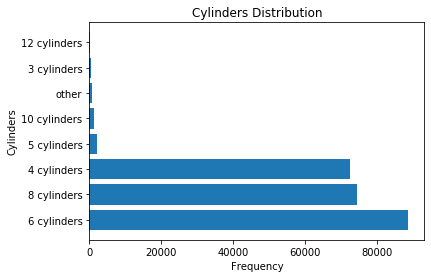

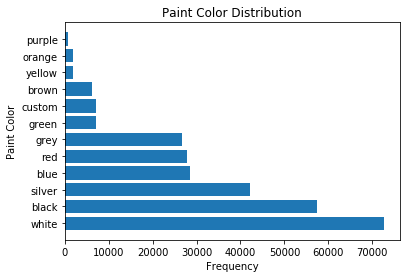

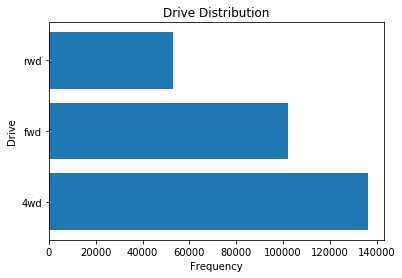

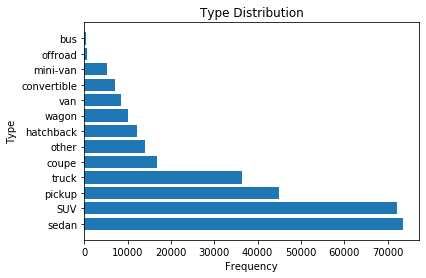

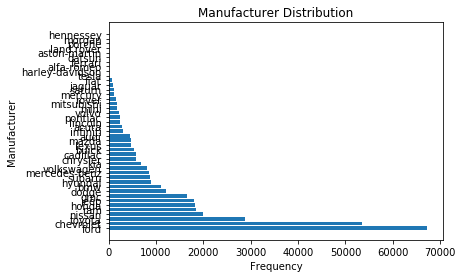

In [36]:
# See the distribution of unique values in the 'condition' column:
plt.figure()
plt.barh(df_work2['condition'].value_counts().index, 
         df_work2['condition'].value_counts().values)
plt.title("Condition Distribution")
plt.xlabel("Frequency")
plt.ylabel("Condition")
plt.show();

# See the distribution of unique values in the 'cylinders' column:
plt.figure()
plt.barh(df_work2['cylinders'].value_counts().index, 
         df_work2['cylinders'].value_counts().values)
plt.title("Cylinders Distribution")
plt.xlabel("Frequency")
plt.ylabel("Cylinders")
plt.show();

# See the distribution of unique values in the 'paint_color' column:
plt.figure()
plt.barh(df_work2['paint_color'].value_counts().index, 
         df_work2['paint_color'].value_counts().values)
plt.title("Paint Color Distribution")
plt.xlabel("Frequency")
plt.ylabel("Paint Color")
plt.show();

# See the distribution of unique values in the 'drive' column:
plt.figure()
plt.barh(df_work2['drive'].value_counts().index, 
         df_work2['drive'].value_counts().values)
plt.title("Drive Distribution")
plt.xlabel("Frequency")
plt.ylabel("Drive")
plt.show();

# See the distribution of unique values in the 'type' column:
plt.figure()
plt.barh(df_work2['type'].value_counts().index, 
         df_work2['type'].value_counts().values)
plt.title("Type Distribution")
plt.xlabel("Frequency")
plt.ylabel("Type")
plt.show();

# See the distribution of unique values in the 'manufacturer' column:
plt.figure()
plt.barh(df_work2['manufacturer'].value_counts().index, 
         df_work2['manufacturer'].value_counts().values)
plt.title("Manufacturer Distribution")
plt.xlabel("Frequency")
plt.ylabel("Manufacturer")
plt.show();

As we can see from the distribution charts above, we have few dominant values in each column, thus, assigning missing values as the most frequent value within the column would actually impose bias towards our model, especially when we the percentage of missing values is high (from 18% to 38%). Thus, it was decided to assign those missing values as a separate value. 

In [37]:
# Filling in missing values with new 'missing' name:
df_work2['condition'].fillna('missing', inplace=True)
df_work2['cylinders'].fillna('missing', inplace=True)
df_work2['paint_color'].fillna('missing', inplace=True)
df_work2['drive'].fillna('missing', inplace=True)
df_work2['type'].fillna('missing', inplace=True)
df_work2['manufacturer'].fillna('missing', inplace=True)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

long            0.807338
lat             0.807338
paint_color     0.000000
type            0.000000
drive           0.000000
transmission    0.000000
title_status    0.000000
odometer        0.000000
fuel            0.000000
cylinders       0.000000
condition       0.000000
manufacturer    0.000000
year            0.000000
price           0.000000
dtype: float64

In [38]:
# Let's drop na values of lat and long columns, as they are less than 1%:
df_work2.dropna(subset=['lat'], inplace=True)
df_work2.dropna(subset=['long'], inplace=True)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

long            0.0
lat             0.0
paint_color     0.0
type            0.0
drive           0.0
transmission    0.0
title_status    0.0
odometer        0.0
fuel            0.0
cylinders       0.0
condition       0.0
manufacturer    0.0
year            0.0
price           0.0
dtype: float64

In [39]:
df_work2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366257 entries, 0 to 539758
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         366257 non-null  int64  
 1   year          366257 non-null  float64
 2   manufacturer  366257 non-null  object 
 3   condition     366257 non-null  object 
 4   cylinders     366257 non-null  object 
 5   fuel          366257 non-null  object 
 6   odometer      366257 non-null  float64
 7   title_status  366257 non-null  object 
 8   transmission  366257 non-null  object 
 9   drive         366257 non-null  object 
 10  type          366257 non-null  object 
 11  paint_color   366257 non-null  object 
 12  lat           366257 non-null  float64
 13  long          366257 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 41.9+ MB


In [40]:
# Let's now convert our categorical columns into dummy variables:
df_work3 = pd.get_dummies(df_work2)
print(df_work3.shape)
df_work3.head()

(366257, 110)


,price,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_missing,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,10299,2012.0,90186.0,35.7636,-78.7443,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9500,2011.0,85000.0,36.1032,-79.8794,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3995,2004.0,212526.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,12995,2015.0,85127.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,10995,2014.0,112383.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Let's remove all the spaces within column names and make them all lowercase (in case if there are some uppercase letters):
df_work3.columns = df_work3.columns.str.replace(' ', '_')
df_work3.columns = map(str.lower, df_work3.columns)
df_work3.head()

,price,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_missing,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,10299,2012.0,90186.0,35.7636,-78.7443,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9500,2011.0,85000.0,36.1032,-79.8794,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3995,2004.0,212526.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,12995,2015.0,85127.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,10995,2014.0,112383.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Resetting index:
df_work3 = df_work3.reset_index().drop(columns = ['index']).copy()
df_work3

,price,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_missing,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,10299,2012.0,90186.0,35.7636,-78.7443,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9500,2011.0,85000.0,36.1032,-79.8794,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3995,2004.0,212526.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12995,2015.0,85127.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,10995,2014.0,112383.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366252,12955,2015.0,74508.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
366253,13995,2016.0,97545.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
366254,10995,2010.0,80328.0,35.7636,-78.7443,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
366255,6495,2015.0,83521.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Now we have our clean processed dataframe. Let's mone onto the modelling part.

## Modelling: Linear Regression

In [49]:
# ScikitLearn Linear Regression (default values):

# Assigning data (X) and target (y) columns:
X_lm = df_work3.loc[:, df_work3.columns != 'price']
y_lm = df_work3['price']

print('X_lm shape:', X_lm.shape)
print('y_lm shape:', y_lm.shape)

# Let's split our dataframe into train and test sets:
X_lm_train, X_lm_test, y_lm_train, y_lm_test = train_test_split(X_lm, y_lm, test_size = 0.2, random_state=1)

print('X_lm_train shape:', X_lm_train.shape)
print('y_lm_train shape:', y_lm_train.shape)
print('X_lm_test shape:', X_lm_test.shape)
print('y_lm_test shape:', y_lm_test.shape)
print("---------------------------------------------------------------")

# 1. Instantiate the model
myLM = LinearRegression()

# 2. Fit the model
myLM.fit(X_lm_train, y_lm_train)

# 3. Make prediction (will use it for mae)
y_lm_train_pred = myLM.predict(X_lm_train)
y_lm_test_pred = myLM.predict(X_lm_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_lm_test, y_lm_test_pred))
print("The mean value of the price column is: ", y_lm_test.mean())
print("The train set R^2 of our model is: ", round(myLM.score(X_lm_train,y_lm_train),4))
print("The test set R^2 of our model is: ", round(myLM.score(X_lm_test,y_lm_test),4))

X_lm shape: (366257, 109)
y_lm shape: (366257,)
X_lm_train shape: (293005, 109)
y_lm_train shape: (293005,)
X_lm_test shape: (73252, 109)
y_lm_test shape: (73252,)
---------------------------------------------------------------
The mean absolute error of our model is:  4347.037743991505
The mean value of the price column is:  14676.97776169934
The train set R2 of our model is:  0.639
The test set R2 of our model is:  0.6338


In [55]:
# ScikitLearn Linear Regression (with Standard Scaler):

# Assigning data (X) and target (y) columns:
X_lm = df_work3.loc[:, df_work3.columns != 'price']
y_lm = df_work3['price']

print('X_lm shape:', X_lm.shape)
print('y_lm shape:', y_lm.shape)

# Let's split our dataframe into train and test sets:
X_lm_train, X_lm_test, y_lm_train, y_lm_test = train_test_split(X_lm, y_lm, test_size = 0.2, random_state=1)

print('X_lm_train shape:', X_lm_train.shape)
print('y_lm_train shape:', y_lm_train.shape)
print('X_lm_test shape:', X_lm_test.shape)
print('y_lm_test shape:', y_lm_test.shape)
print("---------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_lm_train)
X_lm_train = scaler.transform(X_lm_train)
X_lm_test = scaler.transform(X_lm_test)

# 1. Instantiate the model
myLM = LinearRegression()

# 2. Fit the model
myLM.fit(X_lm_train, y_lm_train)

# 3. Make prediction (will use it for mae)
y_lm_train_pred = myLM.predict(X_lm_train)
y_lm_test_pred = myLM.predict(X_lm_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_lm_test, y_lm_test_pred))
print("The mean value of the price column is: ", y_lm_test.mean())
print("The train set R^2 of our model is: ", round(myLM.score(X_lm_train,y_lm_train),4))
print("The test set R^2 of our model is: ", round(myLM.score(X_lm_test,y_lm_test),4))

X_lm shape: (366257, 109)
y_lm shape: (366257,)
X_lm_train shape: (293005, 109)
y_lm_train shape: (293005,)
X_lm_test shape: (73252, 109)
y_lm_test shape: (73252,)
---------------------------------------------------------------
The mean absolute error of our model is:  4349.816792177216
The mean value of the price column is:  14676.97776169934
The train set R2 of our model is:  0.639
The test set R2 of our model is:  0.6338


## Modelling: Ridge Regression

In [45]:
# ScikitLearn Ridge Regression (default values):

# Assigning data (X) and target (y) columns:
X_rr = df_work3.loc[:, df_work3.columns != 'price']
y_rr = df_work3['price']

print('X_rr shape:', X_rr.shape)
print('y_rr shape:', y_rr.shape)

# Let's split our dataframe into train and test sets:
X_rr_train, X_rr_test, y_rr_train, y_rr_test = train_test_split(X_rr, y_rr, test_size = 0.2, random_state=1)

print('X_rr_train shape:', X_rr_train.shape)
print('y_rr_train shape:', y_rr_train.shape)
print('X_rr_test shape:', X_rr_test.shape)
print('y_rr_test shape:', y_rr_test.shape)
print("---------------------------------------------------------------")

# 1. Instantiate the model
myRR = Ridge()

# 2. Fit the model
myRR.fit(X_rr_train, y_rr_train)

# 3. Make prediction (will use it for mae)
y_rr_train_pred = myRR.predict(X_rr_train)
y_rr_test_pred = myRR.predict(X_rr_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_rr_test, y_rr_test_pred))
print("The mean value of the price column is: ", y_rr_test.mean())
print("The train set R^2 of our model is: ", round(myRR.score(X_rr_train,y_rr_train),4))
print("The test set R^2 of our model is: ", round(myRR.score(X_rr_test,y_rr_test),4))

X_rr shape: (366257, 109)
y_rr shape: (366257,)
X_rr_train shape: (293005, 109)
y_rr_train shape: (293005,)
X_rr_test shape: (73252, 109)
y_rr_test shape: (73252,)
---------------------------------------------------------------
The mean absolute error of our model is:  4347.243313907914
The mean value of the price column is:  14676.97776169934
The train set R2 of our model is:  0.639
The test set R2 of our model is:  0.6338


In [56]:
# ScikitLearn Ridge Regression (with Standard Scaler):

# Assigning data (X) and target (y) columns:
X_rr = df_work3.loc[:, df_work3.columns != 'price']
y_rr = df_work3['price']

print('X_rr shape:', X_rr.shape)
print('y_rr shape:', y_rr.shape)

# Let's split our dataframe into train and test sets:
X_rr_train, X_rr_test, y_rr_train, y_rr_test = train_test_split(X_rr, y_rr, test_size = 0.2, random_state=1)

print('X_rr_train shape:', X_rr_train.shape)
print('y_rr_train shape:', y_rr_train.shape)
print('X_rr_test shape:', X_rr_test.shape)
print('y_rr_test shape:', y_rr_test.shape)
print("---------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_lm_train)
X_lm_train = scaler.transform(X_lm_train)
X_lm_test = scaler.transform(X_lm_test)

# 1. Instantiate the model
myRR = Ridge()

# 2. Fit the model
myRR.fit(X_rr_train, y_rr_train)

# 3. Make prediction (will use it for mae)
y_rr_train_pred = myRR.predict(X_rr_train)
y_rr_test_pred = myRR.predict(X_rr_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_rr_test, y_rr_test_pred))
print("The mean value of the price column is: ", y_rr_test.mean())
print("The train set R^2 of our model is: ", round(myRR.score(X_rr_train,y_rr_train),4))
print("The test set R^2 of our model is: ", round(myRR.score(X_rr_test,y_rr_test),4))

X_rr shape: (366257, 109)
y_rr shape: (366257,)
X_rr_train shape: (293005, 109)
y_rr_train shape: (293005,)
X_rr_test shape: (73252, 109)
y_rr_test shape: (73252,)
---------------------------------------------------------------
The mean absolute error of our model is:  4347.243313907914
The mean value of the price column is:  14676.97776169934
The train set R2 of our model is:  0.639
The test set R2 of our model is:  0.6338


## Modelling: RidgeCV Regression 

In [80]:
# Scikit Learn RidgeCV Regression (cv=5):

# Assigning data (X) and target (y) columns:
X_rrcv = df_work3.loc[:, df_work3.columns != 'price']
y_rrcv = df_work3['price']

print('X_rrcv shape:', X_rrcv.shape)
print('y_rrcv shape:', y_rrcv.shape)

# Let's split our dataframe into train and test sets:
X_rrcv_train, X_rrcv_test, y_rrcv_train, y_rrcv_test = train_test_split(X_rrcv, y_rrcv, test_size = 0.2, random_state=1)

print('X_rr_train shape:', X_rrcv_train.shape)
print('y_rr_train shape:', y_rrcv_train.shape)
print('X_rr_test shape:', X_rrcv_test.shape)
print('y_rr_test shape:', y_rrcv_test.shape)
print("---------------------------------------------------------------")

# 1. Instantiate the model
myRRCV = RidgeCV(cv=5)

# 2. Fit the model
myRRCV.fit(X_rrcv_train, y_rrcv_train)

# 3. Make prediction (will use it for mae)
y_rrcv_train_pred = myRRCV.predict(X_rrcv_train)
y_rrcv_test_pred = myRRCV.predict(X_rrcv_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_rrcv_test, y_rrcv_test_pred))
print("The mean value of the price column is: ", y_rrcv_test.mean())
print("The train set R^2 of our model is: ", round(myRRCV.score(X_rrcv_train,y_rrcv_train),4))
print("The test set R^2 of our model is: ", round(myRRCV.score(X_rrcv_test,y_rrcv_test),4))
print()


X_rrcv shape: (366257, 109)
y_rrcv shape: (366257,)
X_rr_train shape: (293005, 109)
y_rr_train shape: (293005,)
X_rr_test shape: (73252, 109)
y_rr_test shape: (73252,)
---------------------------------------------------------------


C:\Users\Meylis\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.73147e-17): result may not be accurate.
  overwrite_a=True).T


The mean absolute error of our model is:  4347.06279807068
The mean value of the price column is:  14676.97776169934
The train set R2 of our model is:  0.639
The test set R2 of our model is:  0.6338



In [47]:
# Scikit Learn RidgeCV Regression (cv=5, alphas updated):

# Assigning data (X) and target (y) columns:
X_rrcv = df_work3.loc[:, df_work3.columns != 'price']
y_rrcv = df_work3['price']

print('X_rrcv shape:', X_rrcv.shape)
print('y_rrcv shape:', y_rrcv.shape)

# Let's split our dataframe into train and test sets:
X_rrcv_train, X_rrcv_test, y_rrcv_train, y_rrcv_test = train_test_split(X_rrcv, y_rrcv, test_size = 0.2, random_state=1)

print('X_rr_train shape:', X_rrcv_train.shape)
print('y_rr_train shape:', y_rrcv_train.shape)
print('X_rr_test shape:', X_rrcv_test.shape)
print('y_rr_test shape:', y_rrcv_test.shape)
print("---------------------------------------------------------------")

# 1. Instantiate the model
myRRCV = RidgeCV(alphas=[0.001, 0.01, 0,1, 1, 2, 4, 6, 8, 10, 15, 20], cv=5)

# 2. Fit the model
myRRCV.fit(X_rrcv_train, y_rrcv_train)

# 3. Make prediction (will use it for mae)
y_rrcv_train_pred = myRRCV.predict(X_rrcv_train)
y_rrcv_test_pred = myRRCV.predict(X_rrcv_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_rrcv_test, y_rrcv_test_pred))
print("The mean value of the price column is: ", y_rrcv_test.mean())
print("The train set R^2 of our model is: ", round(myRRCV.score(X_rrcv_train,y_rrcv_train),4))
print("The test set R^2 of our model is: ", round(myRRCV.score(X_rrcv_test,y_rrcv_test),4))
print()

X_rrcv shape: (366257, 109)
y_rrcv shape: (366257,)
X_rr_train shape: (293005, 109)
y_rr_train shape: (293005,)
X_rr_test shape: (73252, 109)
y_rr_test shape: (73252,)
---------------------------------------------------------------
The mean absolute error of our model is:  4347.038002602254
The mean value of the price column is:  14676.97776169934
The train set R2 of our model is:  0.639
The test set R2 of our model is:  0.6338



## Modelling: Lasso Regression 

In [46]:
# ScikitLearn Lasso Regression:

# Assigning data (X) and target (y) columns:
X_lr = df_work3.loc[:, df_work3.columns != 'price']
y_lr = df_work3['price']

print('X_lr shape:', X_lr.shape)
print('y_lr shape:', y_lr.shape)

# Let's split our dataframe into train and test sets:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size = 0.2, random_state=1)

print('X_lr_train shape:', X_lr_train.shape)
print('y_lr_train shape:', y_lr_train.shape)
print('X_lr_test shape:', X_lr_test.shape)
print('y_lr_test shape:', y_lr_test.shape)
print("---------------------------------------------------------------")

# 1. Instantiate the model
myLasso = Lasso(alpha=0.001)

# 2. Fit the model
myLasso.fit(X_lr_train, y_lr_train)

# 3. Make prediction (will use it for mae)
y_lr_train_pred = myLasso.predict(X_lr_train)
y_lr_test_pred = myLasso.predict(X_lr_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_lr_test, y_lr_test_pred))
print("The mean value of the price column is: ", y_lr_test.mean())
print("The train set R^2 of our model is: ", round(myLasso.score(X_lr_train,y_lr_train),4))
print("The test set R^2 of our model is: ", round(myLasso.score(X_lr_test,y_lr_test),4))

X_lr shape: (366257, 109)
y_lr shape: (366257,)
X_lr_train shape: (293005, 109)
y_lr_train shape: (293005,)
X_lr_test shape: (73252, 109)
y_lr_test shape: (73252,)
---------------------------------------------------------------


C:\Users\Meylis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2471708597955.7383, tolerance: 3440782582.1000214
  positive)


The mean absolute error of our model is:  4347.035692325594
The mean value of the price column is:  14676.97776169934
The train set R2 of our model is:  0.639
The test set R2 of our model is:  0.6338


In [53]:
# ScikitLearn Lasso Regression (with StandardScaler and max_iter=10,000):

# Assigning data (X) and target (y) columns:
X_lr = df_work3.loc[:, df_work3.columns != 'price']
y_lr = df_work3['price']

print('X_lr shape:', X_lr.shape)
print('y_lr shape:', y_lr.shape)

# Let's split our dataframe into train and test sets:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size = 0.2, random_state=1)

print('X_lr_train shape:', X_lr_train.shape)
print('y_lr_train shape:', y_lr_train.shape)
print('X_lr_test shape:', X_lr_test.shape)
print('y_lr_test shape:', y_lr_test.shape)
print("---------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_lr_train)
X_lr_train = scaler.transform(X_lr_train)
X_lr_test = scaler.transform(X_lr_test)

# 1. Instantiate the model
myLasso = Lasso(alpha=0.001, max_iter=10000)

# 2. Fit the model
myLasso.fit(X_lr_train, y_lr_train)

# 3. Make prediction (will use it for mae)
y_lr_train_pred = myLasso.predict(X_lr_train)
y_lr_test_pred = myLasso.predict(X_lr_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_lr_test, y_lr_test_pred))
print("The mean value of the price column is: ", y_lr_test.mean())
print("The train set R^2 of our model is: ", round(myLasso.score(X_lr_train,y_lr_train),4))
print("The test set R^2 of our model is: ", round(myLasso.score(X_lr_test,y_lr_test),4))

X_lr shape: (366257, 109)
y_lr shape: (366257,)
X_lr_train shape: (293005, 109)
y_lr_train shape: (293005,)
X_lr_test shape: (73252, 109)
y_lr_test shape: (73252,)
---------------------------------------------------------------


C:\Users\Meylis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1317811933583.713, tolerance: 3440782582.1000214
  positive)


The mean absolute error of our model is:  4347.037392624016
The mean value of the price column is:  14676.97776169934
The train set R2 of our model is:  0.639
The test set R2 of our model is:  0.6338


In [45]:
# Let's now run the Lasso Regression model with different alpha values and see how our R^2 scores change:
train_scores_lr = []
test_scores_lr = []

alpha_values = [0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8, 10] 

for a in alpha_values:
    
    myLasso = Lasso(alpha=a)
    myLasso.fit(X_lr_train, y_lr_train)
    
    train_scores_lr.append(myLasso.score(X_lr_train,y_lr_train))
    test_scores_lr.append(myLasso.score(X_lr_test,y_lr_test))
    
    print(f'Train set R^2 score with alpha={a}: {myLasso.score(X_lr_train,y_lr_train)}')
    print(f'Validation set R^2 score with alpha={a}: {myLasso.score(X_lr_test,y_lr_test)}')

C:\Users\Meylis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5806233990825.523, tolerance: 3440782582.1000214
  positive)


Train set R2 score with alpha=0.01: 0.6390357790339902
Validation set R2 score with alpha=0.01: 0.6338364656456495


C:\Users\Meylis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2877750204295.8477, tolerance: 3440782582.1000214
  positive)


Train set R2 score with alpha=0.05: 0.6390245888378143
Validation set R2 score with alpha=0.05: 0.6338382541382295


C:\Users\Meylis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2252032815398.706, tolerance: 3440782582.1000214
  positive)


Train set R2 score with alpha=0.1: 0.6389900819472228
Validation set R2 score with alpha=0.1: 0.6338368026485774


C:\Users\Meylis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1861983369368.1143, tolerance: 3440782582.1000214
  positive)


Train set R2 score with alpha=0.2: 0.6389131213062643
Validation set R2 score with alpha=0.2: 0.6338239241978397


C:\Users\Meylis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3923627917.486328, tolerance: 3440782582.1000214
  positive)


Train set R2 score with alpha=0.4: 0.638768693506784
Validation set R2 score with alpha=0.4: 0.6337540977578304
Train set R2 score with alpha=0.6: 0.6386582160944332
Validation set R2 score with alpha=0.6: 0.6336425633547964
Train set R2 score with alpha=0.8: 0.6385061878968112
Validation set R2 score with alpha=0.8: 0.6334817615052453
Train set R2 score with alpha=1: 0.63833106992145
Validation set R2 score with alpha=1: 0.6332952380922942
Train set R2 score with alpha=2: 0.63754528620448
Validation set R2 score with alpha=2: 0.6326386627005516
Train set R2 score with alpha=4: 0.6353007482195613
Validation set R2 score with alpha=4: 0.6309931065513604
Train set R2 score with alpha=6: 0.6319706525804523
Validation set R2 score with alpha=6: 0.6286482074210165
Train set R2 score with alpha=8: 0.6293452372484263
Validation set R2 score with alpha=8: 0.6263323901313724
Train set R2 score with alpha=10: 0.6276625859401228
Validation set R2 score with alpha=10: 0.6245211411841256


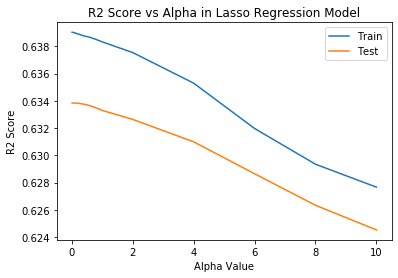

In [47]:
# Let's plot our results:
plt.figure()
plt.title("R^2 Score vs Alpha in Lasso Regression Model")
plt.plot(alpha_values, train_scores_lr, label="Train")
plt.plot(alpha_values, test_scores_lr, label="Test")
plt.legend()
plt.xlabel("Alpha Value")
plt.ylabel("R^2 Score")
plt.show()

## Modelling: LassoCV Regression 

In [55]:
# ScikitLearn LassoCV Regression (default values):

# Assigning data (X) and target (y) columns:
X_lrcv = df_work3.loc[:, df_work3.columns != 'price']
y_lrcv = df_work3['price']

print('X_lrcv shape:', X_lrcv.shape)
print('y_lrcv shape:', y_lrcv.shape)

# Let's split our dataframe into train and test sets:
X_lrcv_train, X_lrcv_test, y_lrcv_train, y_lrcv_test = train_test_split(X_lrcv, y_lrcv, test_size = 0.2, random_state=1)

print('X_lr_train shape:', X_lrcv_train.shape)
print('y_lr_train shape:', y_lrcv_train.shape)
print('X_lr_test shape:', X_lrcv_test.shape)
print('y_lr_test shape:', y_lrcv_test.shape)
print("---------------------------------------------------------------")

# 1. Instantiate the model
myLassoCV = LassoCV()

# 2. Fit the model
myLassoCV.fit(X_lrcv_train, y_lrcv_train)

# 3. Make prediction (will use it for mae)
y_lrcv_train_pred = myLassoCV.predict(X_lrcv_train)
y_lrcv_test_pred = myLassoCV.predict(X_lrcv_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_lrcv_test, y_lrcv_test_pred))
print("The mean value of the price column is: ", y_lrcv_test.mean())
print("The train set R^2 of our model is: ", round(myLassoCV.score(X_lrcv_train,y_lrcv_train),4))
print("The test set R^2 of our model is: ", round(myLassoCV.score(X_lrcv_test,y_lrcv_test),4))
print()

X_lrcv shape: (366257, 109)
y_lrcv shape: (366257,)
X_lr_train shape: (293005, 109)
y_lr_train shape: (293005,)
X_lr_test shape: (73252, 109)
y_lr_test shape: (73252,)
---------------------------------------------------------------
The mean absolute error of our model is:  6831.794156626754
The mean value of the price column is:  14676.97776169934
The train set R2 of our model is:  0.2594
The test set R2 of our model is:  0.2576



In [61]:
# ScikitLearn LassoCV Regression (custom values):

# Assigning data (X) and target (y) columns:
X_lrcv = df_work3.loc[:, df_work3.columns != 'price']
y_lrcv = df_work3['price']

print('X_lrcv shape:', X_lrcv.shape)
print('y_lrcv shape:', y_lrcv.shape)

# Let's split our dataframe into train and test sets:
X_lrcv_train, X_lrcv_test, y_lrcv_train, y_lrcv_test = train_test_split(X_lrcv, y_lrcv, test_size = 0.2, random_state=1)

print('X_lrcv_train shape:', X_lrcv_train.shape)
print('y_lrcv_train shape:', y_lrcv_train.shape)
print('X_lrcv_test shape:', X_lrcv_test.shape)
print('y_lrcv_test shape:', y_lrcv_test.shape)
print("---------------------------------------------------------------")

# 1. Instantiate the model
myLassoCV = LassoCV(normalize=True, cv=5, random_state=1)

# 2. Fit the model
myLassoCV.fit(X_lrcv_train, y_lrcv_train)

# 3. Make prediction (will use it for mae)
y_lrcv_train_pred = myLassoCV.predict(X_lrcv_train)
y_lrcv_test_pred = myLassoCV.predict(X_lrcv_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_lrcv_test, y_lrcv_test_pred))
print("The mean value of the price column is: ", y_lrcv_test.mean())
print("The train set R^2 of our model is: ", round(myLassoCV.score(X_lrcv_train,y_lrcv_train),4))
print("The test set R^2 of our model is: ", round(myLassoCV.score(X_lrcv_test,y_lrcv_test),4))
print()

X_lrcv shape: (366257, 109)
y_lrcv shape: (366257,)
X_lrcv_train shape: (293005, 109)
y_lrcv_train shape: (293005,)
X_lrcv_test shape: (73252, 109)
y_lrcv_test shape: (73252,)
---------------------------------------------------------------
The mean absolute error of our model is:  4344.579412862722
The mean value of the price column is:  14676.97776169934
The train set R2 of our model is:  0.639
The test set R2 of our model is:  0.6338



## Modelling: Elastic Regression 

In [66]:
# ScikitLearn Elastic Regression (default values):

# Assigning data (X) and target (y) columns:
X_elr = df_work3.loc[:, df_work3.columns != 'price']
y_elr = df_work3['price']

print('X_elr shape:', X_elr.shape)
print('y_elr shape:', y_elr.shape)

# Let's split our dataframe into train and test sets:
X_elr_train, X_elr_test, y_elr_train, y_elr_test = train_test_split(X_elr, y_elr, test_size = 0.2, random_state=1)

print('X_elr_train shape:', X_elr_train.shape)
print('y_elr_train shape:', y_elr_train.shape)
print('X_elr_test shape:', X_elr_test.shape)
print('y_elr_test shape:', y_elr_test.shape)
print("---------------------------------------------------------------")

# 1. Instantiate the model
myER = ElasticNet()

# 2. Fit the model
myER.fit(X_elr_train, y_elr_train)

# 3. Make prediction (will use it for mae)
y_elr_train_pred = myER.predict(X_elr_train)
y_elr_test_pred = myER.predict(X_elr_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_elr_test, y_elr_test_pred))
print("The mean value of the price column is: ", y_elr_test.mean())
print("The train set R^2 of our model is: ", round(myER.score(X_elr_train,y_elr_train),4))
print("The test set R^2 of our model is: ", round(myER.score(X_elr_test,y_elr_test),4))

X_elr shape: (366257, 109)
y_elr shape: (366257,)
X_elr_train shape: (293005, 109)
y_elr_train shape: (293005,)
X_elr_test shape: (73252, 109)
y_elr_test shape: (73252,)
---------------------------------------------------------------
The mean absolute error of our model is:  5193.210544177357
The mean value of the price column is:  14676.97776169934
The train set R2 of our model is:  0.5126
The test set R2 of our model is:  0.5072


C:\Users\Meylis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6245557277708.551, tolerance: 3440782582.1000214
  positive)


Train set R2 score with alpha=0.0001: 0.6384790715976623
Validation set R2 score with alpha=0.0001: 0.6336901531827764


C:\Users\Meylis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6267583414876.091, tolerance: 3440782582.1000214
  positive)


Train set R2 score with alpha=0.0003: 0.6372519848765545
Validation set R2 score with alpha=0.0003: 0.6329982537721166


C:\Users\Meylis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6283378996963.521, tolerance: 3440782582.1000214
  positive)


Train set R2 score with alpha=0.0005: 0.6362783186787113
Validation set R2 score with alpha=0.0005: 0.6323269167337802


C:\Users\Meylis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6142654825005.106, tolerance: 3440782582.1000214
  positive)


Train set R2 score with alpha=0.001: 0.6345944450856733
Validation set R2 score with alpha=0.001: 0.6309800228236151
Train set R2 score with alpha=0.003: 0.6315283574294464
Validation set R2 score with alpha=0.003: 0.6281093122765242
Train set R2 score with alpha=0.005: 0.630051792026227
Validation set R2 score with alpha=0.005: 0.6265909448313463
Train set R2 score with alpha=0.01: 0.6277991356224129
Validation set R2 score with alpha=0.01: 0.6241891962506919
Train set R2 score with alpha=0.05: 0.6179544184027623
Validation set R2 score with alpha=0.05: 0.6137695649808712
Train set R2 score with alpha=0.1: 0.6088405395864691
Validation set R2 score with alpha=0.1: 0.6043524329973626
Train set R2 score with alpha=0.2: 0.5935483261575081
Validation set R2 score with alpha=0.2: 0.588747763125975
Train set R2 score with alpha=0.4: 0.5678914426345947
Validation set R2 score with alpha=0.4: 0.5628009031672587
Train set R2 score with alpha=0.6: 0.5463919033176479
Validation set R2 score with

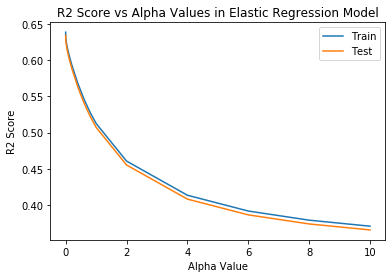

In [67]:
# Let's now run the Lasso Regression model with different alpha values and see how our R^2 scores change:
train_scores_er = []
test_scores_er = []

alpha_values = [0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8, 10] 

for a in alpha_values:
    
    myER = ElasticNet(alpha=a)
    myER.fit(X_elr_train, y_elr_train)
    
    train_scores_er.append(myER.score(X_elr_train,y_elr_train))
    test_scores_er.append(myER.score(X_elr_test,y_elr_test))
    
    print(f'Train set R^2 score with alpha={a}: {myER.score(X_elr_train,y_elr_train)}')
    print(f'Validation set R^2 score with alpha={a}: {myER.score(X_elr_test,y_elr_test)}')
    

# Let's plot our results:
plt.figure()
plt.title("R^2 Score vs Alpha Values in Elastic Regression Model")
plt.plot(alpha_values, train_scores_er, label="Train")
plt.plot(alpha_values, test_scores_er, label="Test")
plt.legend()
plt.xlabel("Alpha Value")
plt.ylabel("R^2 Score")
plt.show()

## Modelling: KNN Regression 

In [73]:
# ScikitLearn KNN Regression (default values):

# Assigning data (X) and target (y) columns:
X_knn = df_work3.loc[:, df_work3.columns != 'price']
y_knn = df_work3['price']

print('X_knn shape:', X_knn.shape)
print('y_knn shape:', y_knn.shape)

# Let's split our dataframe into train and test sets:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size = 0.2, random_state=1)

print('X_knn_train shape:', X_knn_train.shape)
print('y_knn_train shape:', y_knn_train.shape)
print('X_knn_test shape:', X_knn_test.shape)
print('y_knn_test shape:', y_knn_test.shape)
print("---------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_knn_train)
X_knn_train = scaler.transform(X_knn_train)
X_knn_test = scaler.transform(X_knn_test)

# 1. Instantiate the model
myKNN = KNeighborsRegressor()

# 2. Fit the model
myKNN.fit(X_knn_train, y_knn_train)

# 3. Make prediction (will use it for mae)
y_knn_train_pred = myKNN.predict(X_knn_train)
y_knn_test_pred = myKNN.predict(X_knn_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_knn_test, y_knn_test_pred))
print("The mean value of the price column is: ", y_knn_test.mean())
print("The train set R^2 of our model is: ", round(myKNN.score(X_knn_train,y_knn_train),4))
print("The test set R^2 of our model is: ", round(myKNN.score(X_knn_test,y_knn_test),4))
print()

X_knn shape: (366257, 109)
y_knn shape: (366257,)
X_knn_train shape: (293005, 109)
y_knn_train shape: (293005,)
X_knn_test shape: (73252, 109)
y_knn_test shape: (73252,)
---------------------------------------------------------------
The mean absolute error of our model is:  3334.231540435756
The mean value of the price column is:  14676.97776169934
The train set R^2 of our model is:  0.8327
The test set R^2 of our model is:  0.7298



In [68]:
# ScikitLearn KNN Regression (weights='distance'):

# Assigning data (X) and target (y) columns:
X_knn = df_work3.loc[:, df_work3.columns != 'price']
y_knn = df_work3['price']

print('X_knn shape:', X_knn.shape)
print('y_knn shape:', y_knn.shape)

# Let's split our dataframe into train and test sets:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size = 0.2, random_state=1)

print('X_knn_train shape:', X_knn_train.shape)
print('y_knn_train shape:', y_knn_train.shape)
print('X_knn_test shape:', X_knn_test.shape)
print('y_knn_test shape:', y_knn_test.shape)
print("---------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_knn_train)
X_knn_train = scaler.transform(X_knn_train)
X_knn_test = scaler.transform(X_knn_test)

# 1. Instantiate the model
myKNN = KNeighborsRegressor(weights='distance')

# 2. Fit the model
myKNN.fit(X_knn_train, y_knn_train)

# 3. Make prediction (will use it for mae)
y_knn_train_pred = myKNN.predict(X_knn_train)
y_knn_test_pred = myKNN.predict(X_knn_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_knn_test, y_knn_test_pred))
print("The mean value of the price column is: ", y_knn_test.mean())
print("The train set R^2 of our model is: ", round(myKNN.score(X_knn_train,y_knn_train),4))
print("The test set R^2 of our model is: ", round(myKNN.score(X_knn_test,y_knn_test),4))
print()

X_knn shape: (366257, 109)
y_knn shape: (366257,)
X_knn_train shape: (293005, 109)
y_knn_train shape: (293005,)
X_knn_test shape: (73252, 109)
y_knn_test shape: (73252,)
---------------------------------------------------------------
The mean absolute error of our model is:  2515.5283858836788
The mean value of the price column is:  14676.97776169934
The train set R2 of our model is:  0.9994
The test set R2 of our model is:  0.7855



We can clearly see that with hyperparameter `weights='distance'` the R^2 score improved from 0.73 to 0.786.

X_knn_small shape: (109877, 109)
y_knn_small shape: (109877,)
X_knn_small_train shape: (87901, 109)
y_knn_small_train shape: (87901,)
X_knn_small_test shape: (21976, 109)
y_knn_small_test shape: (21976,)
---------------------------------------------------------------
Train set R^2 score with k_value=1: 0.9995688206305098
Test set R^2 score with k_value=1: 0.5465193679703321
Train set R^2 score with k_value=3: 0.9997524815934458
Test set R^2 score with k_value=3: 0.6702238594241303
Train set R^2 score with k_value=5: 0.9997595785609267
Test set R^2 score with k_value=5: 0.688148496794022
Train set R^2 score with k_value=7: 0.9997597005941635
Test set R^2 score with k_value=7: 0.6951110135471861
Train set R^2 score with k_value=9: 0.9997601639910693
Test set R^2 score with k_value=9: 0.696434768022659
Train set R^2 score with k_value=11: 0.9997603374663926
Test set R^2 score with k_value=11: 0.6947017665961641


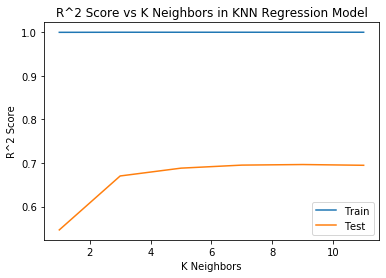

In [71]:
# ScikitLearn KNN Regression (finding optimal k_neighbors):

# Let's actually create a subset of our dataframe, and see how different k_neigbors affect our R^2 score:
df_knn_small = df_work3.sample(frac=0.3, random_state=1)

# Assigning data (X) and target (y) columns:
X_knn_small = df_knn_small.loc[:, df_knn_small.columns != 'price']
y_knn_small = df_knn_small['price']

print('X_knn_small shape:', X_knn_small.shape)
print('y_knn_small shape:', y_knn_small.shape)

# Let's split our dataframe into train and test sets:
X_knn_small_train, X_knn_small_test, y_knn_small_train, y_knn_small_test = train_test_split(X_knn_small, y_knn_small, test_size = 0.2, random_state=1)

print('X_knn_small_train shape:', X_knn_small_train.shape)
print('y_knn_small_train shape:', y_knn_small_train.shape)
print('X_knn_small_test shape:', X_knn_small_test.shape)
print('y_knn_small_test shape:', y_knn_small_test.shape)
print("---------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_knn_small_train)
X_knn_small_train = scaler.transform(X_knn_small_train)
X_knn_small_test = scaler.transform(X_knn_small_test)

# Running through loop:
train_scores_knn = []
test_scores_knn = []

k_values = list(range(1, 12, 2))

for k in k_values:
    
    myKNN = KNeighborsRegressor(n_neighbors=k, weights='distance')
    myKNN.fit(X_knn_small_train, y_knn_small_train)
    
    train_scores_knn.append(myKNN.score(X_knn_small_train,y_knn_small_train))
    test_scores_knn.append(myKNN.score(X_knn_small_test,y_knn_small_test))
    
    print(f'Train set R^2 score with k_value={k}: {myKNN.score(X_knn_small_train,y_knn_small_train)}')
    print(f'Test set R^2 score with k_value={k}: {myKNN.score(X_knn_small_test,y_knn_small_test)}')

    
# Let's plot our results:
plt.figure()
plt.title("R^2 Score vs K Neighbors in KNN Regression Model")
plt.plot(k_values, train_scores_knn, label="Train")
plt.plot(k_values, test_scores_knn, label="Test")
plt.legend()
plt.xlabel("K Neighbors")
plt.ylabel("R^2 Score")
plt.show()

## Modelling: Decision Tree Regression 

In [74]:
# ScikitLearn DT Regression (default values):

# Assigning data (X) and target (y) columns:
X_dt = df_work3.loc[:, df_work3.columns != 'price']
y_dt = df_work3['price']

print('X_dt shape:', X_dt.shape)
print('y_dt shape:', y_dt.shape)

# Let's split our dataframe into train and test sets:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size = 0.2, random_state=1)

print('X_dt_train shape:', X_dt_train.shape)
print('y_dt_train shape:', y_dt_train.shape)
print('X_dt_test shape:', X_dt_test.shape)
print('y_dt_test shape:', y_dt_test.shape)
print("---------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_dt_train)
X_dt_train = scaler.transform(X_dt_train)
X_dt_test = scaler.transform(X_dt_test)

# 1. Instantiate the model
myDT = DecisionTreeRegressor()

# 2. Fit the model
myDT.fit(X_dt_train, y_dt_train)

# 3. Make prediction (will use it for mae)
y_dt_train_pred = myDT.predict(X_dt_train)
y_dt_test_pred = myDT.predict(X_dt_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_dt_test, y_dt_test_pred))
print("The mean value of the price column is: ", y_dt_test.mean())
print("The train set R^2 of our model is: ", round(myDT.score(X_dt_train,y_dt_train),4))
print("The test set R^2 of our model is: ", round(myDT.score(X_dt_test,y_dt_test),4))
print()

X_dt shape: (366257, 109)
y_dt shape: (366257,)
X_dt_train shape: (293005, 109)
y_dt_train shape: (293005,)
X_dt_test shape: (73252, 109)
y_dt_test shape: (73252,)
---------------------------------------------------------------
The mean absolute error of our model is:  2299.4557235615994
The mean value of the price column is:  14676.97776169934
The train set R^2 of our model is:  0.9994
The test set R^2 of our model is:  0.7831



## Modelling: LinearSVR Regression 

In [74]:
# ScikitLearn LinearSVR Regression (default values):

# Assigning data (X) and target (y) columns:
X_svr = df_work3.loc[:, df_work3.columns != 'price']
y_svr = df_work3['price']

print('X_svr shape:', X_svr.shape)
print('y_svr shape:', y_svr.shape)

# Let's split our dataframe into train and test sets:
X_svr_train, X_svr_test, y_svr_train, y_svr_test = train_test_split(X_svr, y_svr, test_size = 0.2, random_state=1)

print('X_svr_train shape:', X_svr_train.shape)
print('y_svr_train shape:', y_svr_train.shape)
print('X_svr_test shape:', X_svr_test.shape)
print('y_svr_test shape:', y_svr_test.shape)
print("-------------------------------------------------------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_svr_train)
X_svr_train = scaler.transform(X_svr_train)
X_svr_test = scaler.transform(X_svr_test)

# 1. Instantiate the model
mySVR = LinearSVR()

# 2. Fit the model
mySVR.fit(X_svr_train, y_svr_train)

# 3. Make prediction (will use it for mae)
y_svr_train_pred = mySVR.predict(X_svr_train)
y_svr_test_pred = mySVR.predict(X_svr_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_svr_test, y_svr_test_pred))
print("The mean value of the price column is: ", y_svr_test.mean())
print("The train set R^2 of our model is: ", round(mySVR.score(X_svr_train,y_svr_train),4))
print("The test set R^2 of our model is: ", round(mySVR.score(X_svr_test,y_svr_test),4))

X_dt shape: (366257, 109)
y_dt shape: (366257,)
X_dt_train shape: (293005, 109)
y_dt_train shape: (293005,)
X_dt_test shape: (73252, 109)
y_dt_test shape: (73252,)
---------------------------------------------------------------
The mean absolute error of our model is:  2299.4557235615994
The mean value of the price column is:  14676.97776169934
The train set R^2 of our model is:  0.9994
The test set R^2 of our model is:  0.7831



## Modelling: RandomForestRegressor

In [53]:
# Assigning data (X) and target (y) columns;
X = df_work3.loc[:, df_work3.columns != 'price']
y = df_work3['price']

print(X.shape)
print(y.shape)

(366257, 109)
(366257,)


In [54]:
# Let's now split the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [180]:
# Creating our RF model (default values):
RF = RandomForestRegressor(random_state=1)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_test, y_pred))
print("The mean value of the price column is: ", df_work3['price'].mean())
print("The train set R^2 of our model is: ", round(RF.score(X_train,y_train),4))
print("The test set R^2 of our model is: ", round(RF.score(X_test,y_test),4))

The mean absolute error of our model is:  1846.9223123938261
The mean value of the price column is:  14655.96683749389
The train set R2 of our model is:  0.9835
The test set R2 of our model is:  0.8833


### Hyperparameter Optimization: RandomForestRegressor

Before processing our data onwards, let's actually divide our dataframe into remainder and test sets, so that we could use validation sets further:

In [64]:
# Let's split our dataframe into two sets, the remainder set (which will be train+validation combination) and test set:
df_remainder, df_test = train_test_split(df_work3, test_size=0.2, random_state=1)

print(df_remainder.shape)
print(df_test.shape)

(293005, 110)
(73252, 110)


In [65]:
# Let's actually create a subset of our dataframe, and see how different hyperparameters of RandomForestRegressor model affect our R^2 score:
df_RF_small = df_remainder.sample(frac=0.3, random_state=1)

# Assigning data (X) and target (y) columns;
X_small = df_RF_small.loc[:, df_RF_small.columns != 'price']
y_small = df_RF_small['price']

print(X_small.shape)
print(y_small.shape)

(87902, 109)
(87902,)


In [66]:
# Let's now split the data into train and validation sets:
X_train_RF, X_valid_RF, y_train_RF, y_valid_RF = train_test_split(X_small, y_small, test_size = 0.2, random_state=1)

In [174]:
# Let's now run the RF model with different n_estimators values and see how our R^2 scores change:
train_scores = []
validation_scores = []

n_number = [10,30,50,70,90,100,120,140,160, 180, 200] 

for n in n_number:
    
    myRF = RandomForestRegressor(n_estimators=n, random_state=1)
    myRF.fit(X_train_RF, y_train_RF)
    
    train_scores.append(myRF.score(X_train_RF, y_train_RF))
    validation_scores.append(myRF.score(X_valid_RF, y_valid_RF))
    
    print(f'Train set R^2 score with n_estimators={n}: {myRF.score(X_train_RF, y_train_RF)}')
    print(f'Validation set R^2 score with n_estimators={n}: {myRF.score(X_valid_RF, y_valid_RF)}')

Train set R2 score with n_estimators=10: 0.9668583398483981
Validation set R2 score with n_estimators=10: 0.8170643062808369
Train set R2 score with n_estimators=30: 0.9740375551283901
Validation set R2 score with n_estimators=30: 0.8287291869307307
Train set R2 score with n_estimators=50: 0.9753917382631128
Validation set R2 score with n_estimators=50: 0.832983630866087
Train set R2 score with n_estimators=70: 0.9759902548448991
Validation set R2 score with n_estimators=70: 0.8325311143944291
Train set R2 score with n_estimators=90: 0.9763530168139365
Validation set R2 score with n_estimators=90: 0.8329316486245295
Train set R2 score with n_estimators=100: 0.9763941271253058
Validation set R2 score with n_estimators=100: 0.8332629053395791
Train set R2 score with n_estimators=120: 0.9766120518540408
Validation set R2 score with n_estimators=120: 0.8335563831407076
Train set R2 score with n_estimators=140: 0.9766994774597552
Validation set R2 score with n_estimators=140: 0.833889477692

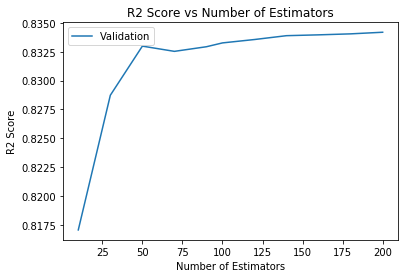

In [192]:
# Let's plot our results:
plt.figure()
plt.title("R^2 Score vs Number of Estimators")
plt.plot(n_number, validation_scores, label="Validation")
plt.legend()
plt.xlabel("Number of Estimators")
plt.ylabel("R^2 Score")
plt.show()

In [52]:
# Let's now run the RF model with different n_estimators values and see how our R^2 scores change:
train_scores2 = []
validation_scores2 = []

n_number = [250,300,350,400] 

for n in n_number:
    
    myRF = RandomForestRegressor(n_estimators=n, random_state=1)
    myRF.fit(X_train_RF, y_train_RF)
    
    train_scores2.append(myRF.score(X_train_RF, y_train_RF))
    validation_scores2.append(myRF.score(X_valid_RF, y_valid_RF))
    
    print(f'Train set R^2 score with n_estimators={n}: {myRF.score(X_train_RF, y_train_RF)}')
    print(f'Validation set R^2 score with n_estimators={n}: {myRF.score(X_valid_RF, y_valid_RF)}')

Train set R2 score with n_estimators=250: 0.9770410208846118
Validation set R2 score with n_estimators=250: 0.8342316127404152
Train set R2 score with n_estimators=300: 0.977065980265204
Validation set R2 score with n_estimators=300: 0.8344381978148245
Train set R2 score with n_estimators=350: 0.9771015970921847
Validation set R2 score with n_estimators=350: 0.8344471240523994
Train set R2 score with n_estimators=400: 0.9771200041966001
Validation set R2 score with n_estimators=400: 0.8343410998726504


In [71]:
# Let's now run the RF model with different max_depth values and see how our R^2 scores change:
train_scores_md = []
validation_scores_md = []

depth = list(range(1,100,5)) 

for d in depth:
    
    myRF = RandomForestRegressor(max_depth=d, random_state=1)
    myRF.fit(X_train_RF, y_train_RF)
    
    train_scores_md.append(myRF.score(X_train_RF, y_train_RF))
    validation_scores_md.append(myRF.score(X_valid_RF, y_valid_RF))
    
    print(f'Train set R^2 score with max_depth={d}: {myRF.score(X_train_RF, y_train_RF)}')
    print(f'Validation set R^2 score with max_depth={d}: {myRF.score(X_valid_RF, y_valid_RF)}')

Train set R2 score with max_depth=1: 0.290882284034672
Validation set R2 score with max_depth=1: 0.30177363867836865
Train set R2 score with max_depth=6: 0.6676997378674955
Validation set R2 score with max_depth=6: 0.6681725444978117
Train set R2 score with max_depth=11: 0.8085546474562768
Validation set R2 score with max_depth=11: 0.7631936140657088
Train set R2 score with max_depth=16: 0.9038707124604959
Validation set R2 score with max_depth=16: 0.8077243668812129
Train set R2 score with max_depth=21: 0.9496816114572361
Validation set R2 score with max_depth=21: 0.8245519645240511
Train set R2 score with max_depth=26: 0.9679602938834827
Validation set R2 score with max_depth=26: 0.8302946788899097
Train set R2 score with max_depth=31: 0.9741829671612976
Validation set R2 score with max_depth=31: 0.8330724322545423
Train set R2 score with max_depth=36: 0.9758879797042355
Validation set R2 score with max_depth=36: 0.8330878931682898
Train set R2 score with max_depth=41: 0.976333032686

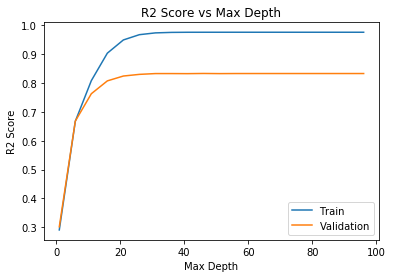

In [72]:
# Let's plot our results:
plt.figure()
plt.title("R^2 Score vs Max Depth")
plt.plot(depth, train_scores_md, label="Train")
plt.plot(depth, validation_scores_md, label="Validation")
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("R^2 Score")
plt.show()

In [76]:
depth[np.argmax(validation_scores_md)]

46

In [77]:
# Creating our RF model (n_estimators=300, max_depth=45 - after hyperparameter optimization):
RF = RandomForestRegressor(n_estimators=300, max_depth=45, random_state=1)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_test, y_pred))
print("The mean value of the price column is: ", df_work3['price'].mean())
print("The train set R^2 of our model is: ", round(RF.score(X_train,y_train),4))
print("The test set R^2 of our model is: ", round(RF.score(X_test,y_test),4))

The mean absolute error of our model is:  1839.133092206612
The mean value of the price column is:  14655.96683749389
The train set R2 of our model is:  0.9838
The test set R2 of our model is:  0.8843


We can see that there is a slight improvement in the R^2 score value after our default n_estimator value of 100, but that improvement is not reasonable enough to make the model too computationally heavy. Thus, it was decided to keep using the default value of n_estimator parameter.

### Multiple Hyperparameter Optimization: RandomForestRegressor

Let's now use GridSearchCV to optimize multiple hyperparameters of our model and see if we can increase it's score.

In [193]:
# Let's actually create a subset of our dataframe, and see how different hyperparameters of RandomForestRegressor model affect our R^2 score:
df_RF_small = df_remainder.sample(frac=0.3, random_state=1)

# Assigning data (X) and target (y) columns;
X_small = df_RF_small.loc[:, df_RF_small.columns != 'price']
y_small = df_RF_small['price']

print(X_small.shape)
print(y_small.shape)

(87902, 109)
(87902,)


In [195]:
# Let's define the hyperparameters to look through:
RF_params = {'max_depth':[10,15,20,30,40,50,60,70,80,90,100], 
             'min_samples_leaf':[1,2,3,4,5]}

In [196]:
# Initiate the RF grid search
myRF_gs = GridSearchCV(estimator=RandomForestRegressor(random_state = 1), \
                        param_grid=RF_params, cv=5, n_jobs=-1, verbose=0)

# Fit the RF grid search
myRF_gs_fitted = myRF_gs.fit(X_small, y_small)

KeyboardInterrupt: 

In [190]:
# Show the best estimators
print(myRF_gs_fitted.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1}


In [197]:
# Show the best estimators
print(myRF_gs_fitted.best_params_)

{'max_depth': 90, 'min_samples_leaf': 2}


In [188]:
# Let's see if our R^2 score improved:
print(myRF_gs_fitted.score(X_small, y_small))
print(myRF_gs_fitted.score(X_test, y_test))

0.7773040464552605
0.7427427422488926


In [198]:
# Let's see if our R^2 score improved:
print(myRF_gs_fitted.score(X_small, y_small))
print(myRF_gs_fitted.score(X_test, y_test))

0.9674377963481268
0.8786504130287467


In [189]:
# Checking scores on whole dataset:

# Assigning data (X) and target (y) columns;
X = df_work3.loc[:, df_work3.columns != 'price']
y = df_work3['price']

# Let's now split the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

RF_adj = RandomForestRegressor(max_depth=10, min_samples_leaf=1, random_state=1)
RF_adj.fit(X_train, y_train)
y_pred = RF_adj.predict(X_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_test, y_pred))
print("The mean value of the price column is: ", df_work3['price'].mean())
print("The train set R^2 of our model is: ", round(RF_adj.score(X_train,y_train),4))
print("The test set R^2 of our model is: ", round(RF_adj.score(X_test,y_test),4))

The mean absolute error of our model is:  3479.735154449074
The mean value of the price column is:  14655.96683749389
The train set R2 of our model is:  0.7569
The test set R2 of our model is:  0.7413


In [ ]:
# Let's define the hyperparameters to look through:
RF_params = {'max_depth':[10,15,20,30,40,50,60,70,80,90,100], 
             'min_samples_leaf':[1,2,3,4,5]}

# Initiate the RF grid search
myRF_gs = GridSearchCV(estimator=RandomForestRegressor(random_state = 1), \
                        param_grid=RF_params, cv=5, n_jobs=-1, verbose=0)

# Fit the RF grid search
myRF_gs_fitted = myRF_gs.fit(X_train, y_train)

# Show the best estimators
print(myRF_gs_fitted.best_params_)

# Let's see if our R^2 score improved:
print(myRF_gs_fitted.score(X_train, y_train))
print(myRF_gs_fitted.score(X_test, y_test))

## Modelling: XGBRegressor

In [46]:
# ScikitLearn XGB Regression (default values):

# Assigning data (X) and target (y) columns:
X_xgb = df_work3.loc[:, df_work3.columns != 'price']
y_xgb = df_work3['price']

print('X_xgb shape:', X_xgb.shape)
print('y_xgb shape:', y_xgb.shape)

# Let's split our dataframe into train and test sets:
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state=1)

print('X_xgb_train shape:', X_xgb_train.shape)
print('y_xgb_train shape:', y_xgb_train.shape)
print('X_xgb_test shape:', X_xgb_test.shape)
print('y_xgb_test shape:', y_xgb_test.shape)
print("-------------------------------------------------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_xgb_train)
X_xgb_train = scaler.transform(X_xgb_train)
X_xgb_test = scaler.transform(X_xgb_test)

# Importing the package (you will need to have py-xgboost-cpu installed, or just import my conda environment that is provided with this notebook):
import xgboost as xgb

# 1. Instantiate the model
myXGB = xgb.XGBRegressor(verbosity=0)
print("myXGB model parameters:", myXGB)
print("-------------------------------------------------------------------------------------------------------")

# 2. Fit the model
myXGB.fit(X_xgb_train, y_xgb_train)

# 3. Make prediction (will use it for mae)
y_xgb_train_pred = myXGB.predict(X_xgb_train)
y_xgb_test_pred = myXGB.predict(X_xgb_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_xgb_test, y_xgb_test_pred))
print("The mean value of the price column is: ", y_xgb_test.mean())
print("The train set R^2 of our model is: ", round(myXGB.score(X_xgb_train,y_xgb_train),4))
print("The test set R^2 of our model is: ", round(myXGB.score(X_xgb_test,y_xgb_test),4))
print()

X_xgb shape: (366257, 109)
y_xgb shape: (366257,)
X_xgb_train shape: (293005, 109)
y_xgb_train shape: (293005,)
X_xgb_test shape: (73252, 109)
y_xgb_test shape: (73252,)
-------------------------------------------------------------------------------------------------------
myXGB model parameters: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
-------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3488.951395737456
The mean value of the price column is:  14676.9777616993

In [47]:
# ScikitLearn XGB Regression (booster='gblinear'):

# Assigning data (X) and target (y) columns:
X_xgb = df_work3.loc[:, df_work3.columns != 'price']
y_xgb = df_work3['price']

print('X_xgb shape:', X_xgb.shape)
print('y_xgb shape:', y_xgb.shape)

# Let's split our dataframe into train and test sets:
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state=1)

print('X_xgb_train shape:', X_xgb_train.shape)
print('y_xgb_train shape:', y_xgb_train.shape)
print('X_xgb_test shape:', X_xgb_test.shape)
print('y_xgb_test shape:', y_xgb_test.shape)
print("-------------------------------------------------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_xgb_train)
X_xgb_train = scaler.transform(X_xgb_train)
X_xgb_test = scaler.transform(X_xgb_test)

# Importing the package (you will need to have py-xgboost-cpu installed, or just import my conda environment that is provided with this notebook):
import xgboost as xgb

# 1. Instantiate the model
myXGB = xgb.XGBRegressor(booster='gblinear', verbosity=0)
print("myXGB model parameters:", myXGB)
print("-------------------------------------------------------------------------------------------------------")

# 2. Fit the model
myXGB.fit(X_xgb_train, y_xgb_train)

# 3. Make prediction (will use it for mae)
y_xgb_train_pred = myXGB.predict(X_xgb_train)
y_xgb_test_pred = myXGB.predict(X_xgb_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_xgb_test, y_xgb_test_pred))
print("The mean value of the price column is: ", y_xgb_test.mean())
print("The train set R^2 of our model is: ", round(myXGB.score(X_xgb_train,y_xgb_train),4))
print("The test set R^2 of our model is: ", round(myXGB.score(X_xgb_test,y_xgb_test),4))
print()

X_xgb shape: (366257, 109)
y_xgb shape: (366257,)
X_xgb_train shape: (293005, 109)
y_xgb_train shape: (293005,)
X_xgb_test shape: (73252, 109)
y_xgb_test shape: (73252,)
-------------------------------------------------------------------------------------------------------
myXGB model parameters: XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
-------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  5020.03824031273
The mean value of the price column is:  14676.977761699

In [48]:
# ScikitLearn XGB Regression (booster='dart'):

# Assigning data (X) and target (y) columns:
X_xgb = df_work3.loc[:, df_work3.columns != 'price']
y_xgb = df_work3['price']

print('X_xgb shape:', X_xgb.shape)
print('y_xgb shape:', y_xgb.shape)

# Let's split our dataframe into train and test sets:
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state=1)

print('X_xgb_train shape:', X_xgb_train.shape)
print('y_xgb_train shape:', y_xgb_train.shape)
print('X_xgb_test shape:', X_xgb_test.shape)
print('y_xgb_test shape:', y_xgb_test.shape)
print("-------------------------------------------------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_xgb_train)
X_xgb_train = scaler.transform(X_xgb_train)
X_xgb_test = scaler.transform(X_xgb_test)

# Importing the package (you will need to have py-xgboost-cpu installed, or just import my conda environment that is provided with this notebook):
import xgboost as xgb

# 1. Instantiate the model
myXGB = xgb.XGBRegressor(booster='dart', verbosity=0)
print("myXGB model parameters:", myXGB)
print("-------------------------------------------------------------------------------------------------------")

# 2. Fit the model
myXGB.fit(X_xgb_train, y_xgb_train)

# 3. Make prediction (will use it for mae)
y_xgb_train_pred = myXGB.predict(X_xgb_train)
y_xgb_test_pred = myXGB.predict(X_xgb_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_xgb_test, y_xgb_test_pred))
print("The mean value of the price column is: ", y_xgb_test.mean())
print("The train set R^2 of our model is: ", round(myXGB.score(X_xgb_train,y_xgb_train),4))
print("The test set R^2 of our model is: ", round(myXGB.score(X_xgb_test,y_xgb_test),4))

X_xgb shape: (366257, 109)
y_xgb shape: (366257,)
X_xgb_train shape: (293005, 109)
y_xgb_train shape: (293005,)
X_xgb_test shape: (73252, 109)
y_xgb_test shape: (73252,)
-------------------------------------------------------------------------------------------------------
myXGB model parameters: XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
-------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3488.951395370839
The mean value of the price column is:  14676.97776169934


### Multiple Hyperparameter Optimization: XGBRegressor

Let's now use GridSearchCV to optimize multiple hyperparameters of our model and see if we can increase it's score.

In [49]:
# Let's actually create a subset of our dataframe, and see how different hyperparameters of XGBRegressor model affect our R^2 score:
df_xgb_small = df_work3.sample(frac=0.3, random_state=1)

# Assigning data (X) and target (y) columns;
X_xgb_small = df_xgb_small.loc[:, df_xgb_small.columns != 'price']
y_xgb_small = df_xgb_small['price']

print('X_xgb_small shape:', X_xgb_small.shape)
print('y_xgb_small shape:', y_xgb_small.shape)

# Let's split our dataframe into train and test sets:
X_xgb_small_train, X_xgb_small_test, y_xgb_small_train, y_xgb_small_test = train_test_split(X_xgb_small, y_xgb_small, test_size = 0.2, random_state=1)

print('X_xgb_small_train shape:', X_xgb_small_train.shape)
print('y_xgb_small_train shape:', y_xgb_small_train.shape)
print('X_xgb_small_test shape:', X_xgb_small_test.shape)
print('y_xgb_small_test shape:', y_xgb_small_test.shape)

X_xgb_small shape: (109877, 109)
y_xgb_small shape: (109877,)
X_xgb_small_train shape: (87901, 109)
y_xgb_small_train shape: (87901,)
X_xgb_small_test shape: (21976, 109)
y_xgb_small_test shape: (21976,)


In [50]:
# Let's define the hyperparameters to look through:
XGB_params = {'max_depth':[3,5,7,10,15,20,30,40,50,60,70,80,90,100],
             'n_estimators':[50,75,100,150,200,250,300]}

In [53]:
# Initiate the grid search:
myXGB_gs = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1, verbosity=0), \
                        param_grid=XGB_params, cv=5, verbose=0)

# Fit the grid search:
myXGB_gs_fitted = myXGB_gs.fit(X_xgb_small_train, y_xgb_small_train)

In [58]:
# Saving our model:
joblib.dump(myXGB_gs_fitted, 'myXGB_gs_fitted_small_dataset.pkl') 

['myXGB_gs_fitted_small_dataset.pkl']

In [56]:
# Show the best estimators
print(myXGB_gs_fitted.best_params_)

{'max_depth': 15, 'n_estimators': 300}


In [103]:
# Let's see if our R^2 score improved:

# Assigning data (X) and target (y) columns on the whole dataset:
X_xgb = df_work3.loc[:, df_work3.columns != 'price']
y_xgb = df_work3['price']

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state=1)

print('Train and Test datasets from the whole dataset:')
print('X_xgb_train shape:', X_xgb_train.shape)
print('y_xgb_train shape:', y_xgb_train.shape)
print('X_xgb_test shape:', X_xgb_test.shape)
print('y_xgb_test shape:', y_xgb_test.shape)
print()
print('Train and Test datasets from the small dataset:') # these were assigned before, and the model was trained on these
print('X_xgb_small_train shape:', X_xgb_small_train.shape)
print('y_xgb_small_train shape:', y_xgb_small_train.shape)
print('X_xgb_small_test shape:', X_xgb_small_test.shape)
print('y_xgb_small_test shape:', y_xgb_small_test.shape)

# Let's see if our R^2 score improved:
print("The small train set R^2 score of our model is: ", round(myXGB_gs_fitted.score(X_xgb_small_train, y_xgb_small_train),4))
print("The small test set R^2 score of our model is: ", round(myXGB_gs_fitted.score(X_xgb_small_test, y_xgb_small_test),4))

Train and Test datasets from the whole dataset:
X_xgb_train shape: (293005, 109)
y_xgb_train shape: (293005,)
X_xgb_test shape: (73252, 109)
y_xgb_test shape: (73252,)

Train and Test datasets from the small dataset:
X_xgb_small_train shape: (87901, 109)
y_xgb_small_train shape: (87901,)
X_xgb_small_test shape: (21976, 109)
y_xgb_small_test shape: (21976,)
The small train set R^2 score of our model is:  0.99
The small test set R^2 score of our model is:  0.8523


In [59]:
# Let's just double check our model with new parameters but running on the whole dataset:

# Let's define the hyperparameters to look through:
XGB_params = {'max_depth':[15], 'n_estimators':[300]}

# Initiate the grid search:
myXGB_gs_big = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1, verbosity=0), param_grid=XGB_params, cv=5, verbose=1)

# Fit the grid search:
myXGB_gs_big_fitted = myXGB_gs_big.fit(X_xgb_train, y_xgb_train)

# Saving our model:
joblib.dump(myXGB_gs_big_fitted, 'myXGB_gs_fitted_big_dataset.pkl') 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 74.7min finished


['myXGB_gs_fitted_big_dataset.pkl']

In [104]:
y_xgb_test_pred = myXGB_gs_big_fitted.predict(X_xgb_test)

print("The mean absolute error of our model is: ", mae(y_xgb_test, y_xgb_test_pred))
print("The mean value of the price column is: ", y_xgb_test.mean())
print("The train set R^2 score of our model is: ", round(myXGB_gs_big_fitted.score(X_xgb_train, y_xgb_train),4))
print("The test set R^2 score of our model is: ", round(myXGB_gs_big_fitted.score(X_xgb_test, y_xgb_test),4))

The mean absolute error of our model is:  1885.0430977885976
The mean value of the price column is:  14676.97776169934
The train set R^2 score of our model is:  0.9789
The test set R^2 score of our model is:  0.8954


In [86]:
# Let's see feature importances of our model:
feat_importances = pd.Series(myXGB_gs_big_fitted.best_estimator_.feature_importances_, index=X_xgb_train.columns)

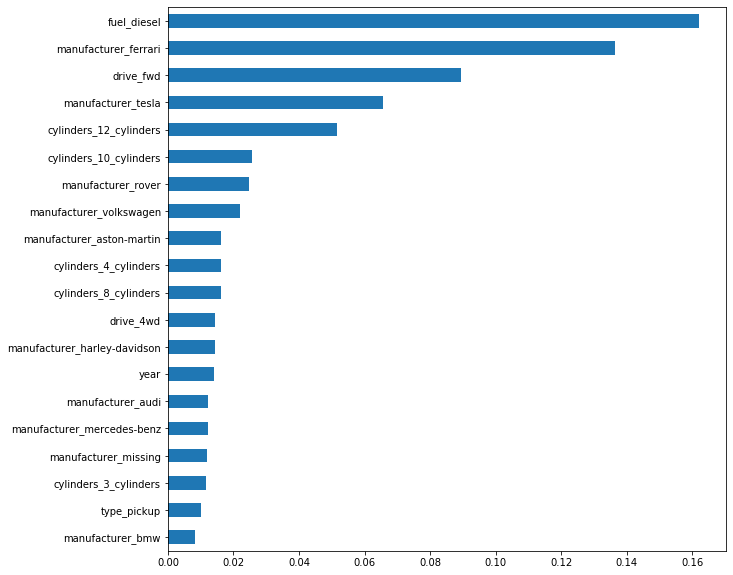

In [91]:
# Top 30 features:
fig, ax = plt.subplots()
feat_importances.sort_values(ascending=False).head(20).plot(kind='barh', x='x', y='y', ax=ax, figsize=(10,10))
plt.gca().invert_yaxis()
plt.show()

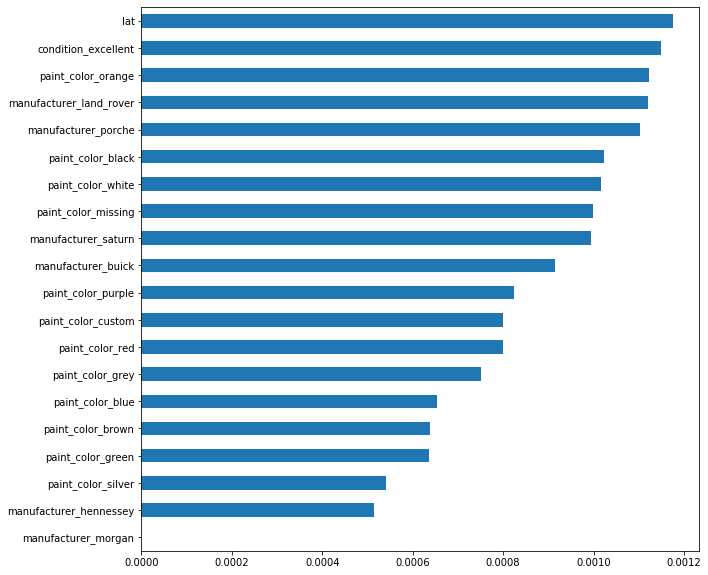

In [90]:
# Bottom 30 features:
fig, ax = plt.subplots()
feat_importances.sort_values(ascending=False).tail(20).plot(kind='barh', x='x', y='y', ax=ax, figsize=(10,10))
plt.gca().invert_yaxis()
plt.show()

We can see that "paint_color" feature is not in top 20, rather it's in bottom 20. Let's remove that feature from our model and run our model again, and see if the score has improved.

In [92]:
# Here's our dataframe before the 'getdummies' function:
df_work2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366257 entries, 0 to 539758
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         366257 non-null  int64  
 1   year          366257 non-null  float64
 2   manufacturer  366257 non-null  object 
 3   condition     366257 non-null  object 
 4   cylinders     366257 non-null  object 
 5   fuel          366257 non-null  object 
 6   odometer      366257 non-null  float64
 7   title_status  366257 non-null  object 
 8   transmission  366257 non-null  object 
 9   drive         366257 non-null  object 
 10  type          366257 non-null  object 
 11  paint_color   366257 non-null  object 
 12  lat           366257 non-null  float64
 13  long          366257 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 41.9+ MB


In [93]:
# Dropping 'paint_color' column:
df_work2_new = df_work2.drop(['paint_color'], axis=1)
df_work2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366257 entries, 0 to 539758
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         366257 non-null  int64  
 1   year          366257 non-null  float64
 2   manufacturer  366257 non-null  object 
 3   condition     366257 non-null  object 
 4   cylinders     366257 non-null  object 
 5   fuel          366257 non-null  object 
 6   odometer      366257 non-null  float64
 7   title_status  366257 non-null  object 
 8   transmission  366257 non-null  object 
 9   drive         366257 non-null  object 
 10  type          366257 non-null  object 
 11  lat           366257 non-null  float64
 12  long          366257 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 39.1+ MB


In [97]:
# Let's now convert our categorical columns into dummy variables:
df_work3_new = pd.get_dummies(df_work2_new)
print(df_work3_new.shape)

# Let's remove all the spaces within column names and make them all lowercase (in case if there are some uppercase letters):
df_work3_new.columns = df_work3_new.columns.str.replace(' ', '_')
df_work3_new.columns = map(str.lower, df_work3_new.columns)

# Resetting index:
df_work3_new = df_work3_new.reset_index().drop(columns = ['index']).copy()
df_work3_new

(366257, 97)


,price,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,type_hatchback,type_mini-van,type_missing,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,10299,2012.0,90186.0,35.7636,-78.7443,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,9500,2011.0,85000.0,36.1032,-79.8794,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3995,2004.0,212526.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12995,2015.0,85127.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,10995,2014.0,112383.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366252,12955,2015.0,74508.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
366253,13995,2016.0,97545.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
366254,10995,2010.0,80328.0,35.7636,-78.7443,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
366255,6495,2015.0,83521.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [99]:
# Assigning data (X) and target (y) columns on the whole dataset:
X_xgb = df_work3_new.loc[:, df_work3_new.columns != 'price']
y_xgb = df_work3_new['price']

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state=1)

print('Train and Test datasets from the whole dataset:')
print('X_xgb_train shape:', X_xgb_train.shape)
print('y_xgb_train shape:', y_xgb_train.shape)
print('X_xgb_test shape:', X_xgb_test.shape)
print('y_xgb_test shape:', y_xgb_test.shape)

Train and Test datasets from the whole dataset:
X_xgb_train shape: (293005, 96)
y_xgb_train shape: (293005,)
X_xgb_test shape: (73252, 96)
y_xgb_test shape: (73252,)


In [100]:
# Let's define the hyperparameters to look through:
XGB_params = {'max_depth':[15], 'n_estimators':[300]}

# Initiate the grid search:
myXGB_gs_big_new = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1, verbosity=0),\
                                param_grid=XGB_params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search:
myXGB_gs_big_fitted_new = myXGB_gs_big_new.fit(X_xgb_train, y_xgb_train)

# Saving our model:
joblib.dump(myXGB_gs_big_fitted_new, 'myXGB_gs_fitted_big_dataset_new.pkl') 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 46.0min finished


['myXGB_gs_fitted_big_dataset_new.pkl']

In [102]:
y_xgb_test_pred = myXGB_gs_big_fitted_new.predict(X_xgb_test)

print("The mean absolute error of our model is: ", mae(y_xgb_test, y_xgb_test_pred))
print("The mean value of the price column is: ", y_xgb_test.mean())
print("The train set R^2 score of our model is: ", round(myXGB_gs_big_fitted_new.score(X_xgb_train, y_xgb_train),4))
print("The test set R^2 score of our model is: ", round(myXGB_gs_big_fitted_new.score(X_xgb_test, y_xgb_test),4))

The mean absolute error of our model is:  1904.0699445314854
The mean value of the price column is:  14676.97776169934
The train set R^2 score of our model is:  0.9769
The test set R^2 score of our model is:  0.8946


In [116]:
df_work2.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'lat', 'long'],
      dtype='object')

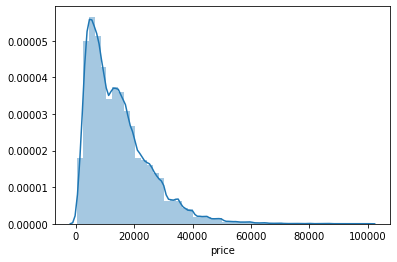

In [121]:
sns.distplot(df_work3["price"])

In [110]:
# Let's now drop those:
df_work4 = df_work3_new.drop(df_work3_new.loc[df_work3_new['price']>=50000].index)

In [111]:
df_work4

,price,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,type_hatchback,type_mini-van,type_missing,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,10299,2012.0,90186.0,35.7636,-78.7443,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,9500,2011.0,85000.0,36.1032,-79.8794,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3995,2004.0,212526.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12995,2015.0,85127.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,10995,2014.0,112383.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366252,12955,2015.0,74508.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
366253,13995,2016.0,97545.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
366254,10995,2010.0,80328.0,35.7636,-78.7443,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
366255,6495,2015.0,83521.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [112]:
# Assigning data (X) and target (y) columns on the whole dataset:
X_xgb = df_work4.loc[:, df_work4.columns != 'price']
y_xgb = df_work4['price']

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state=1)

print('Train and Test datasets from the whole dataset:')
print('X_xgb_train shape:', X_xgb_train.shape)
print('y_xgb_train shape:', y_xgb_train.shape)
print('X_xgb_test shape:', X_xgb_test.shape)
print('y_xgb_test shape:', y_xgb_test.shape)

Train and Test datasets from the whole dataset:
X_xgb_train shape: (290283, 96)
y_xgb_train shape: (290283,)
X_xgb_test shape: (72571, 96)
y_xgb_test shape: (72571,)


In [113]:
# Let's define the hyperparameters to look through:
XGB_params = {'max_depth':[15], 'n_estimators':[300]}

# Initiate the grid search:
myXGB_gs_big_new2 = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1, verbosity=0),\
                                param_grid=XGB_params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search:
myXGB_gs_big_fitted_new2 = myXGB_gs_big_new2.fit(X_xgb_train, y_xgb_train)

# Saving our model:
joblib.dump(myXGB_gs_big_fitted_new2, 'myXGB_gs_fitted_big_dataset_new2.pkl') 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 49.5min finished


['myXGB_gs_fitted_big_dataset_new2.pkl']

In [114]:
y_xgb_test_pred = myXGB_gs_big_fitted_new2.predict(X_xgb_test)

print("The mean absolute error of our model is: ", mae(y_xgb_test, y_xgb_test_pred))
print("The mean value of the price column is: ", y_xgb_test.mean())
print("The train set R^2 score of our model is: ", round(myXGB_gs_big_fitted_new2.score(X_xgb_train, y_xgb_train),4))
print("The test set R^2 score of our model is: ", round(myXGB_gs_big_fitted_new2.score(X_xgb_test, y_xgb_test),4))

The mean absolute error of our model is:  1751.0952870913504
The mean value of the price column is:  14254.943448484932
The train set R^2 score of our model is:  0.9776
The test set R^2 score of our model is:  0.909


In [ ]:
# Notes:
# provide your capstone conda environment (for xgboost)
# also saved models